En este cuaderno se generan las gráficas de las métricas de entrenamiento del algoritmo Monte Carlo en su versión first-visit utilizando un factor de descuento de 0.9 para demostrar que con un factor de descuento de esta magnitud el agente no es capaz de aprender una política que resuelva el entorno.

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import sys
import torch

sys.path.insert(1, '..')
from src.agents import MonteCarlo

In [2]:
def moving_average(data: np.ndarray, window_size: int, mode: str = "valid") -> np.ndarray:
    """Returns the moving average of the data"""
    return np.convolve(data, np.ones(window_size) / window_size, mode=mode)

def plot_results(results: dict, window_size: int = 500, title: str = None, fontsize = None) -> None:
    """Plot the results of the training"""
    rewards = moving_average(results["rewards"], window_size)
    episode_lengths = moving_average(results["episode_lengths"], window_size)
    episode_time = moving_average(results["episode_time"], window_size)

    plt.figure(figsize=(25,7))

    if fontsize:
        plt.rcParams.update({'font.size': fontsize})

    if title:
        plt.suptitle(title)

    plt.subplot(131)
    plt.title("Episode cumulative rewards")
    plt.xlabel("Episode")
    plt.ylabel("Cumulative reward")
    plt.plot(rewards)

    plt.subplot(132)
    plt.title("Episode length")
    plt.xlabel("Episode")
    plt.ylabel("Length")
    plt.plot(episode_lengths)

    plt.subplot(133)
    plt.title("Episode time")
    plt.xlabel("Episode")
    plt.ylabel("Time")
    plt.plot(episode_time)

### Monte Carlo con factor de descuento 0.9

In [13]:
env = gym.make("CliffWalking-v0")
env = gym.wrappers.RecordEpisodeStatistics(env)

N_STEPS = 20_000_000

agent = MonteCarlo(
    env=env,
    discount_factor=0.9,
    learning_rate=0.1,
    initial_epsilon=1.0,
    epsilon_decay=N_STEPS/5,
    final_epsilon=0.1,
    first_visit=False
)

results = agent.train(N_STEPS)

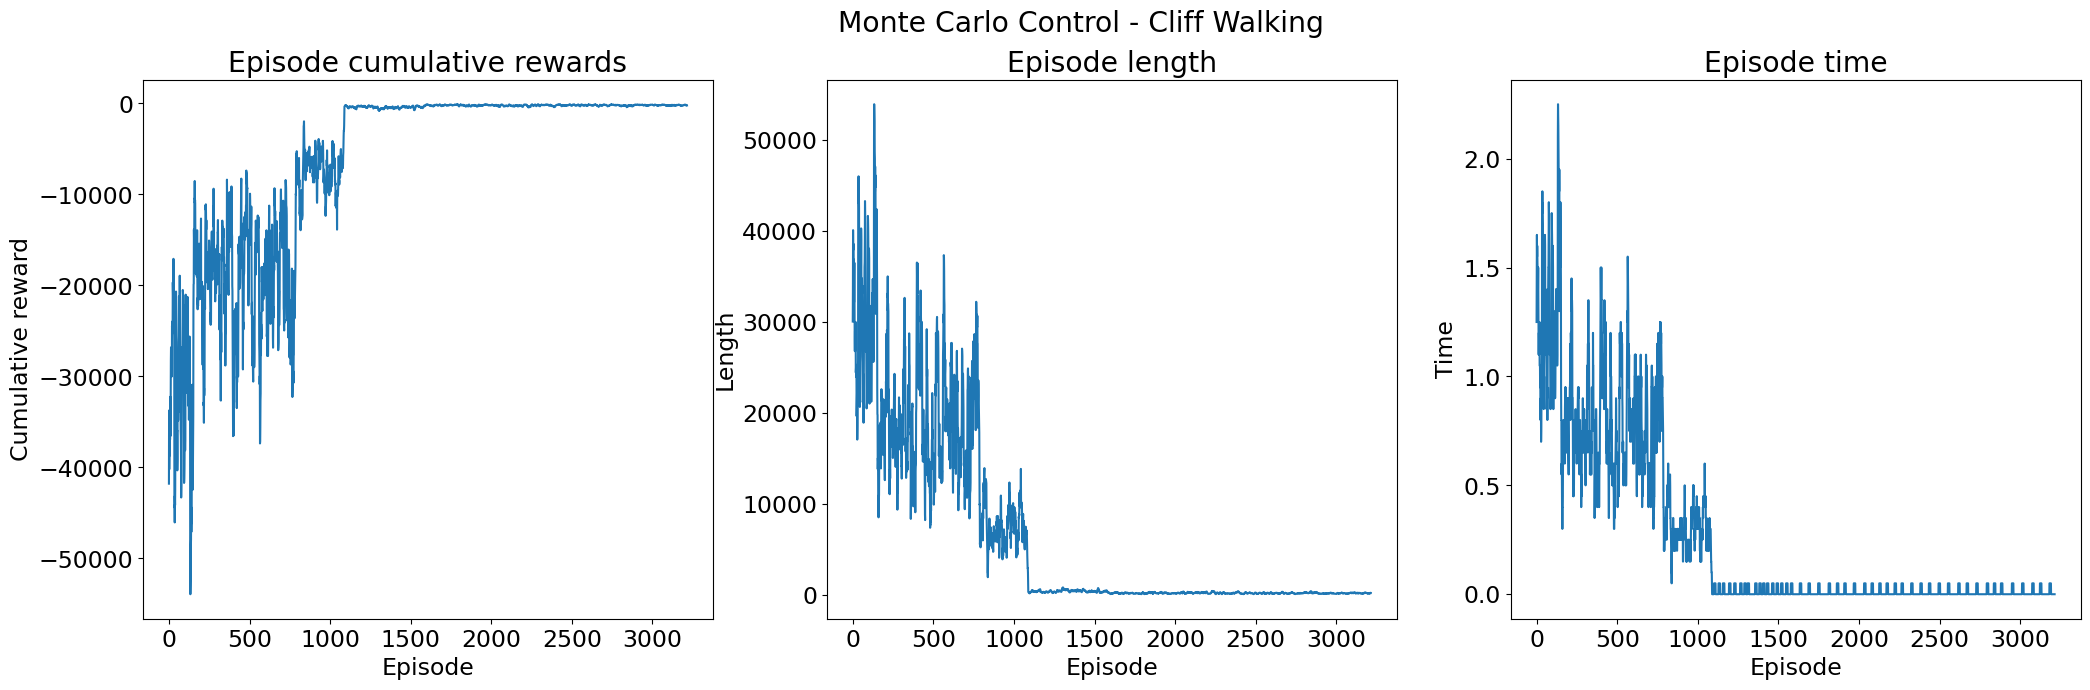

In [6]:
plot_results(results, window_size=10, title="Monte Carlo Control - Cliff Walking", fontsize=16)

### Monte Carlo Off Policy en el entorno Cliff Walking

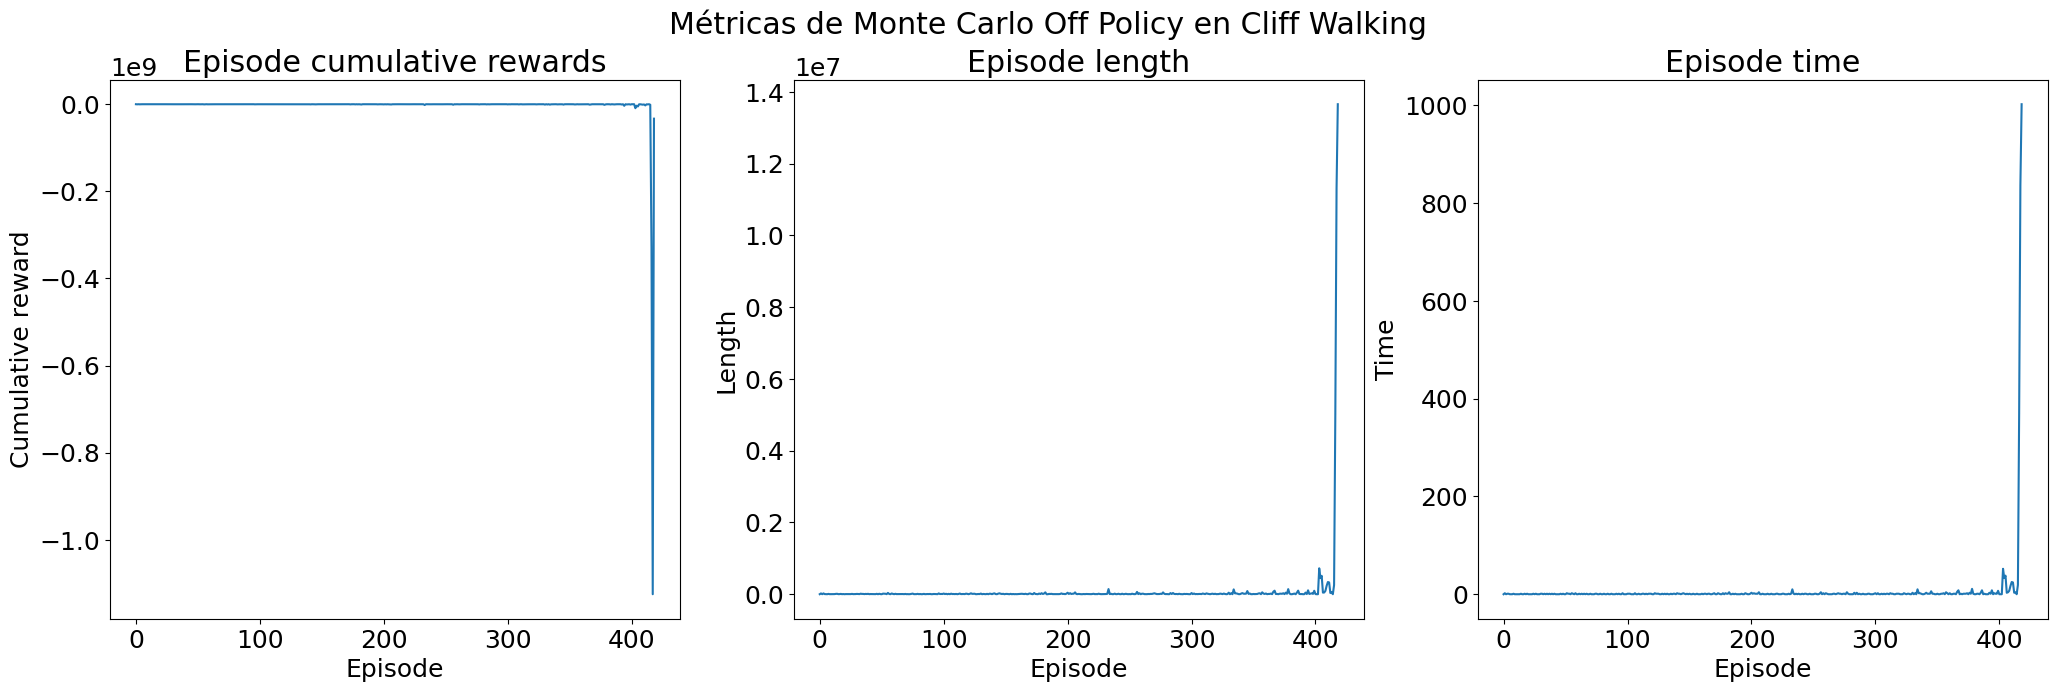

In [11]:
results = torch.load("../saves/metrics/cliffwalking/CliffWalking-v0-MonteCarloOffPolicy.pth")
plot_results(results, window_size=1, title="Métricas de Monte Carlo Off Policy en Cliff Walking", fontsize=18)

In [11]:
print(len(results["rewards"]))

419


### QLearning en el entorno Cliff Walking

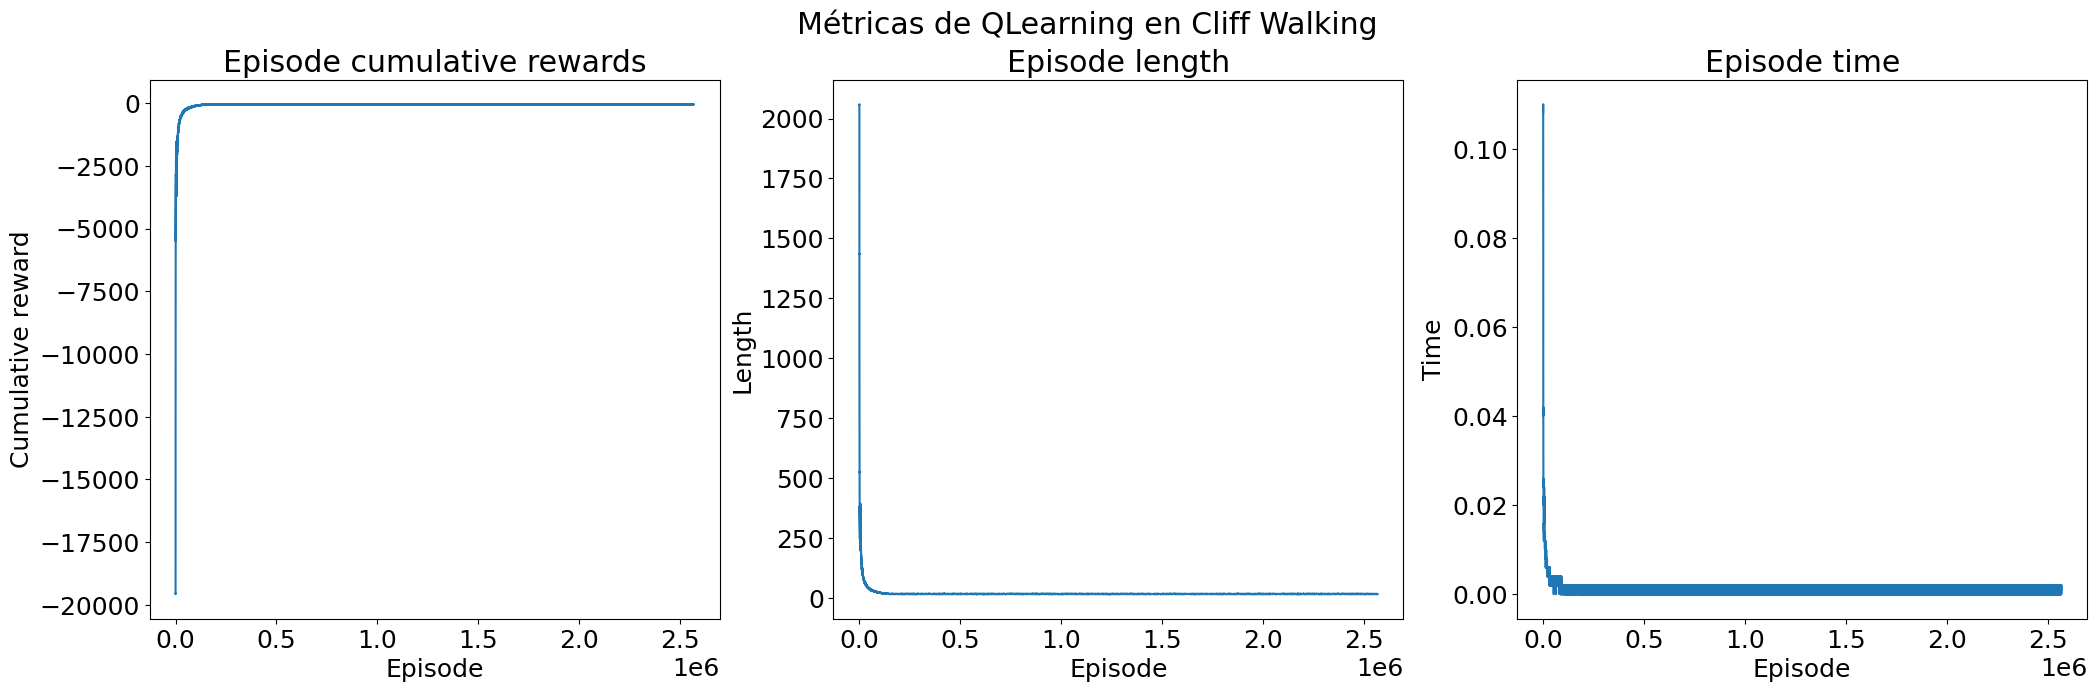

In [12]:
results = torch.load("../saves/metrics/cliffwalking/CliffWalking-v0-QLearning.pth")
plot_results(results, window_size=500, title="Métricas de QLearning en Cliff Walking", fontsize=18)

In [9]:
print(len(results["rewards"]))

2567858


## DQN

### Breakout

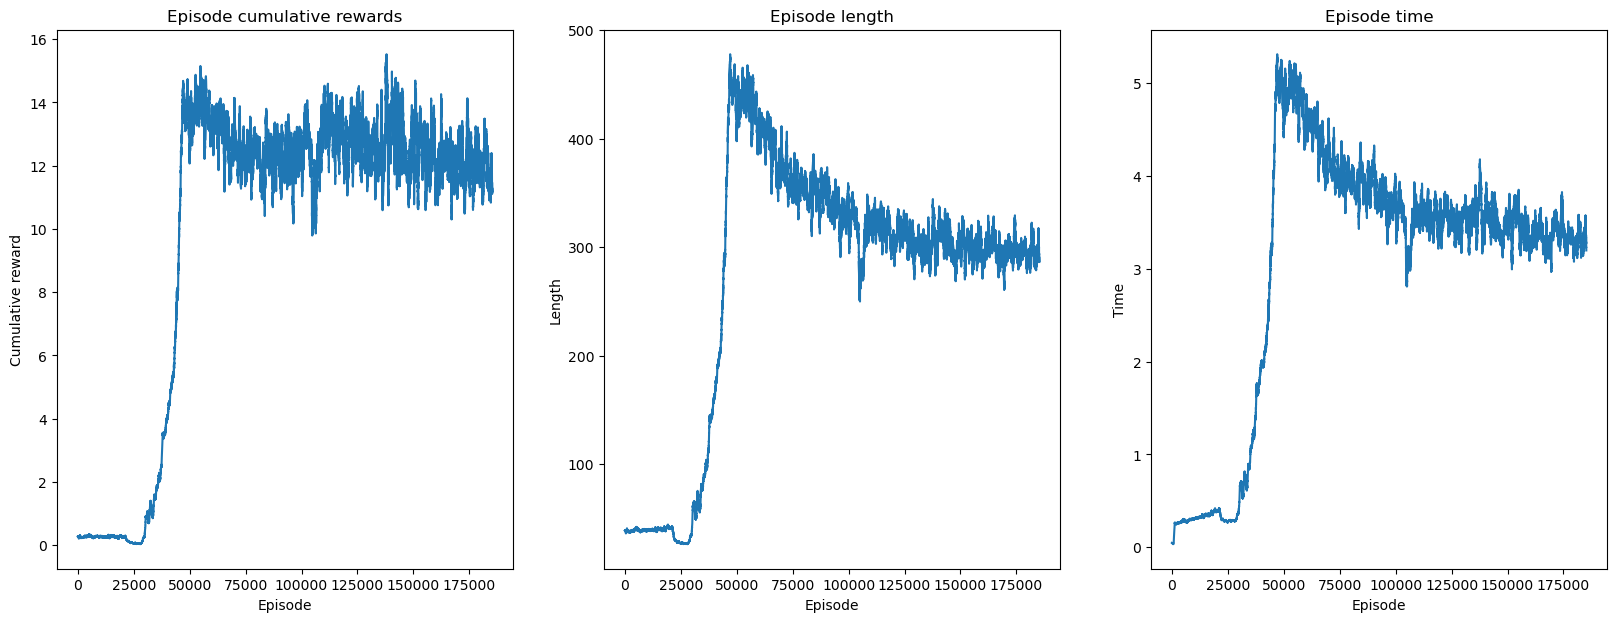

In [13]:
results = torch.load("../saves/metrics/breakout/dqn.pth")
plot_results(results, window_size=500, title="")

### Space Invaders

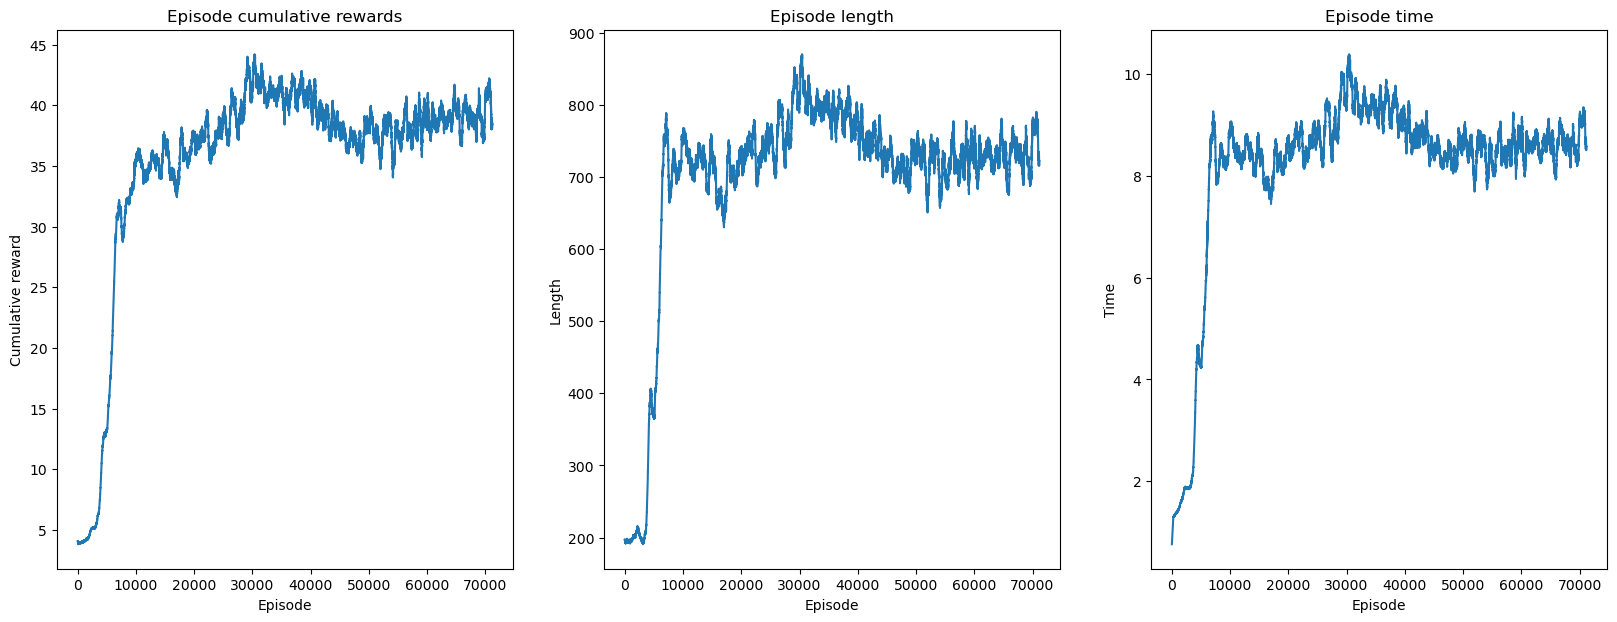

In [14]:
results = torch.load("../saves/metrics/space_invaders/dqn.pth")
plot_results(results, window_size=500, title="")

### Enduro

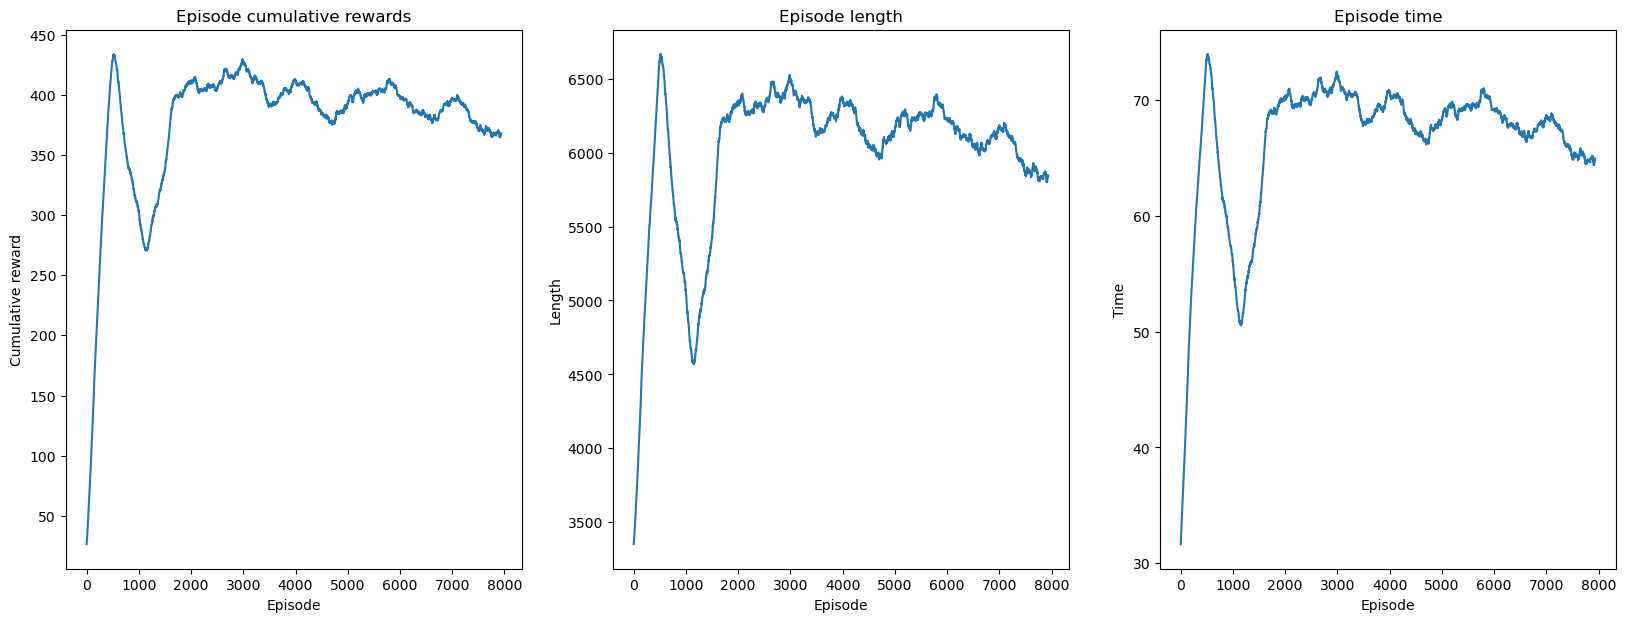

In [15]:
results = torch.load("../saves/metrics/enduro/dqn.pth")
plot_results(results, window_size=500, title="")

### Video Pinball

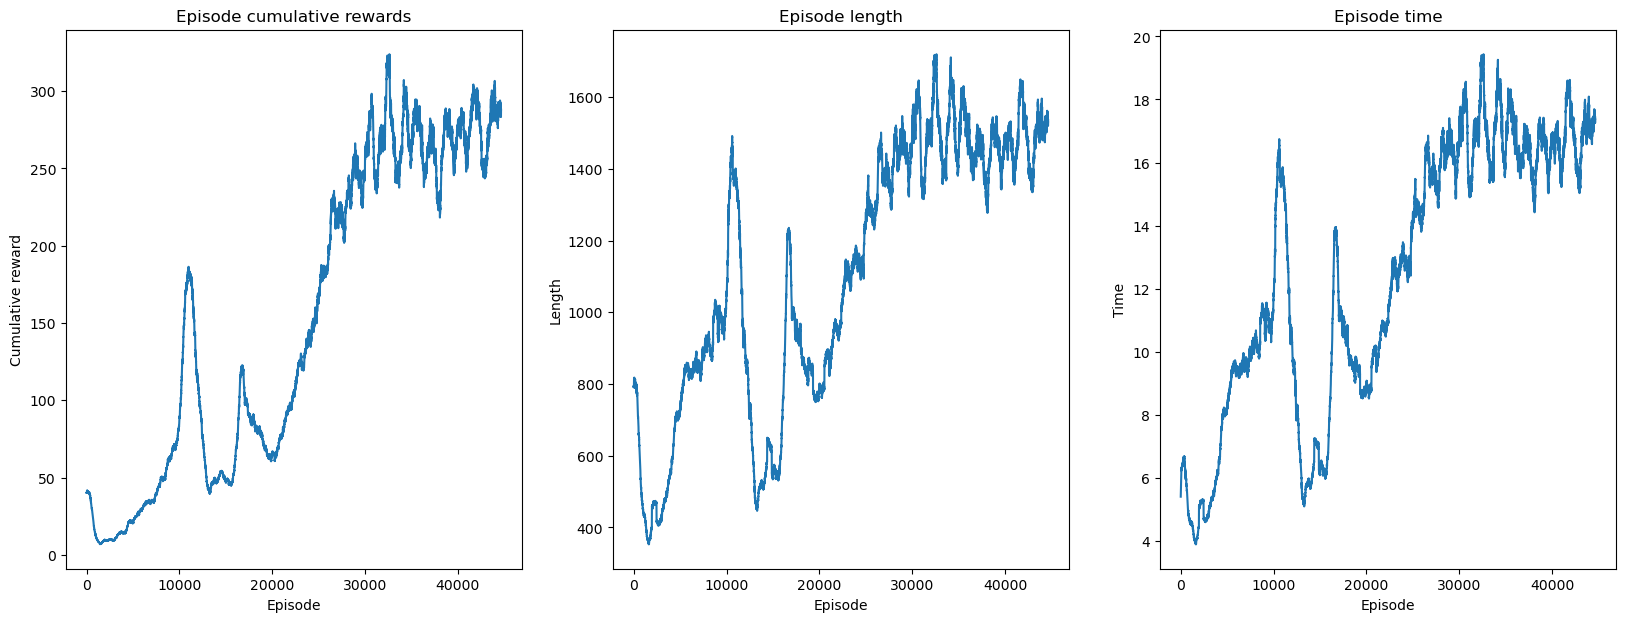

In [16]:
results = torch.load("../saves/metrics/pinball/dqn.pth")
plot_results(results, window_size=500, title="")